In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

In [2]:
from google.colab import files
files.upload()

{}

### 1. Poblem Framming


Case Study: UK Used CClass Cars
Soal : Dataset yang digunakan merupakan listing mobil Mercedec CCclass bekas yang diperjualbelikan di Britania Raya. Terdapat sekitar 4.000 mobil CClass bekas di dalam listing tersebut. kalian dapat mempelajari dataset ini dengan lebih lanjut di halaman ini.

**Business objective** yang akan dicapai yaitu memprediksi harga mobil Mercedec CCclass bekas, dengan bbrpa spesifikasi sebgai berikut yaitu : mileage, transmissi, engines size, fuel

**Output** User dapat, memperkirakan variabel mana yang perlu diperhitungkan sebelum membeli mobil bekas

**Machine learning** yang digunakan dalam kasus ini yaitu kasus regresi, model machine learning yang digunakan yaitu : Linear Reggresion, Knn, dan ensemble Random Forrest

**Perfomnce meassure** yang digunakan dalam kasus ini yaitu : r2, mse (mean square error), dan rmse (root mean square error)

**Resiko** yang mungkin ditimbulkan dari project ini kesalahan memprediksi harga mobil, user perlu mempertimbangka juga tahun mobil dan mileage pada mobil Mercedes CCclass ini

### 2. EDA

In [3]:
df = pd.read_csv('unclean cclass.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   object 
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel type     1329 non-null   object 
 6   engine size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel type2    3808 non-null   object 
 9   engine size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), object(10)
memory usage: 344.4+ KB


In [6]:
df.describe()

,year
count,3904.000000
mean,2017.341189
std,2.213643
min,1991.000000
25%,2016.000000
50%,2018.000000
75%,2019.000000
max,2020.000000


In [66]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

model
 C Class    3907
Name: model, dtype: int64


year
2019.0    1590
2017.0     666
2016.0     545
2018.0     362
2015.0     321
2014.0     136
2020.0     130
2013.0      64
2012.0      26
2011.0      13
2010.0      10
2008.0       8
2007.0       7
2009.0       7
2005.0       5
2002.0       4
2004.0       3
2006.0       3
1991.0       1
1998.0       1
2003.0       1
1995.0       1
Name: year, dtype: int64


price
 £14,000    24
 £19,999    19
 £29,980    19
 £12,000    18
 £20,299    18
            ..
 £23,099     1
 £3,495      1
 £18,970     1
 £13,980     1
 £37,946     1
Name: price, Length: 1846, dtype: int64


transmission
Semi-Auto    2071
Automatic    1636
Manual        199
Other           1
Name: transmission, dtype: int64


mileage
1,000     81
2,000     21
16        20
100       17
3,000     16
          ..
51,936     1
13,567     1
7,163      1
38,824     1
19,488     1
Name: mileage, Length: 3175, dtype: int64


fuel type
31        310
32        240
38        174
37     

Pisahkan data type object dan bukan object

In [7]:
df_obj = df.select_dtypes(include='object')

In [8]:
df_non_obj = df.select_dtypes(exclude='object')

In [9]:
for i in df_obj.columns:
  df_obj[i] = df_obj[i].str.replace(',', '')
  df_obj[i] = df_obj[i].str.replace('£', '')

df_obj

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,model,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,30495,Automatic,NaN,Diesel,2,1200,NaN,NaN,/ad/25017331
1,C Class,29989,Automatic,NaN,Petrol,1.5,1000,NaN,NaN,/ad/25043746
2,C Class,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,30399,Automatic,NaN,Diesel,2,5000,NaN,NaN,/ad/24942816
4,C Class,29899,Automatic,NaN,Diesel,2,4500,NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
4001,C Class,14700,Manual,31357,25,150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,18500,Automatic,28248,31,150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,11900,Manual,48055,31,20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,11300,Automatic,49865,46,145,56.5,Diesel,2.143,/ad/25144481


In [10]:
df_obj.reset_index(drop=True,inplace=True)
df_non_obj.reset_index(drop=True,inplace=True)

In [11]:
df_new = pd.concat([df_non_obj,df_obj],axis=1)
df_new

,year,model,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,2020.0,C Class,30495,Automatic,NaN,Diesel,2,1200,NaN,NaN,/ad/25017331
1,2020.0,C Class,29989,Automatic,NaN,Petrol,1.5,1000,NaN,NaN,/ad/25043746
2,2020.0,C Class,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,2019.0,C Class,30399,Automatic,NaN,Diesel,2,5000,NaN,NaN,/ad/24942816
4,2019.0,C Class,29899,Automatic,NaN,Diesel,2,4500,NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,2017.0,C Class,14700,Manual,31357,25,150,70.6,Diesel,1.598,/ad/25451436
4002,2018.0,C Class,18500,Automatic,28248,31,150,64.2,Diesel,2.143,/ad/25451481
4003,2014.0,C Class,11900,Manual,48055,31,20,65.7,Diesel,2.143,/ad/25057204
4004,2014.0,C Class,11300,Automatic,49865,46,145,56.5,Diesel,2.143,/ad/25144481


In [12]:
df_new.isnull().sum()

year             102
model             99
price             99
transmission      99
mileage          198
fuel type       2677
engine size      164
mileage2         116
fuel type2       198
engine size2     198
reference         99
dtype: int64

Drop missing value

In [13]:
df_new.dropna(inplace=True)

In [14]:
df_new.reset_index(drop=True,inplace=True)

In [15]:
for i in df_new.columns:
    print(i)
    print(df_new[i].value_counts())
    print('\n')

year
2017.0    326
2015.0    236
2016.0    230
2018.0    160
2014.0    130
2013.0     61
2012.0     23
2011.0      8
2010.0      8
2009.0      7
2008.0      6
2007.0      6
2004.0      2
2006.0      2
2002.0      2
2005.0      1
Name: year, dtype: int64


model
 C Class    1208
Name: model, dtype: int64


price
 18999    11
 19000    10
 14999     9
 17990     9
 18998     8
          ..
 11200     1
 20771     1
 9298      1
 12672     1
 8490      1
Name: price, Length: 732, dtype: int64


transmission
Automatic    546
Semi-Auto    521
Manual       141
Name: transmission, dtype: int64


mileage
54000    9
29000    6
50000    5
39000    5
20000    5
        ..
17125    1
20090    1
26428    1
32720    1
30728    1
Name: mileage, Length: 1101, dtype: int64


fuel type
31    309
32    238
38    167
37    101
30     73
25     64
29     55
33     50
34     27
26     24
36     17
39     16
35     12
43     12
27     11
40      8
44      6
46      4
24      4
45      3
47      3
28      3
4

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1208 non-null   float64
 1   model         1208 non-null   object 
 2   price         1208 non-null   object 
 3   transmission  1208 non-null   object 
 4   mileage       1208 non-null   object 
 5   fuel type     1208 non-null   object 
 6   engine size   1208 non-null   object 
 7   mileage2      1208 non-null   object 
 8   fuel type2    1208 non-null   object 
 9   engine size2  1208 non-null   object 
 10  reference     1208 non-null   object 
dtypes: float64(1), object(10)
memory usage: 103.9+ KB


In [17]:
df_new['engine size2'] = df_new['engine size2'].str.replace('Unknown', '2.1')

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1208 non-null   float64
 1   model         1208 non-null   object 
 2   price         1208 non-null   object 
 3   transmission  1208 non-null   object 
 4   mileage       1208 non-null   object 
 5   fuel type     1208 non-null   object 
 6   engine size   1208 non-null   object 
 7   mileage2      1208 non-null   object 
 8   fuel type2    1208 non-null   object 
 9   engine size2  1208 non-null   object 
 10  reference     1208 non-null   object 
dtypes: float64(1), object(10)
memory usage: 103.9+ KB


Ubah data object yang merupaka angka ke float (tipe numerikal)

In [19]:
df_new.columns

Index(['year', 'model', 'price', 'transmission', 'mileage', 'fuel type',
       'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference'],
      dtype='object')

In [20]:
df_new[['price','mileage','engine size', 'mileage2','fuel type','engine size2']] = df_new[['price','mileage','engine size', 'mileage2','fuel type','engine size2']].astype('float64')

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1208 non-null   float64
 1   model         1208 non-null   object 
 2   price         1208 non-null   float64
 3   transmission  1208 non-null   object 
 4   mileage       1208 non-null   float64
 5   fuel type     1208 non-null   float64
 6   engine size   1208 non-null   float64
 7   mileage2      1208 non-null   float64
 8   fuel type2    1208 non-null   object 
 9   engine size2  1208 non-null   float64
 10  reference     1208 non-null   object 
dtypes: float64(7), object(4)
memory usage: 103.9+ KB


Explorasi Data

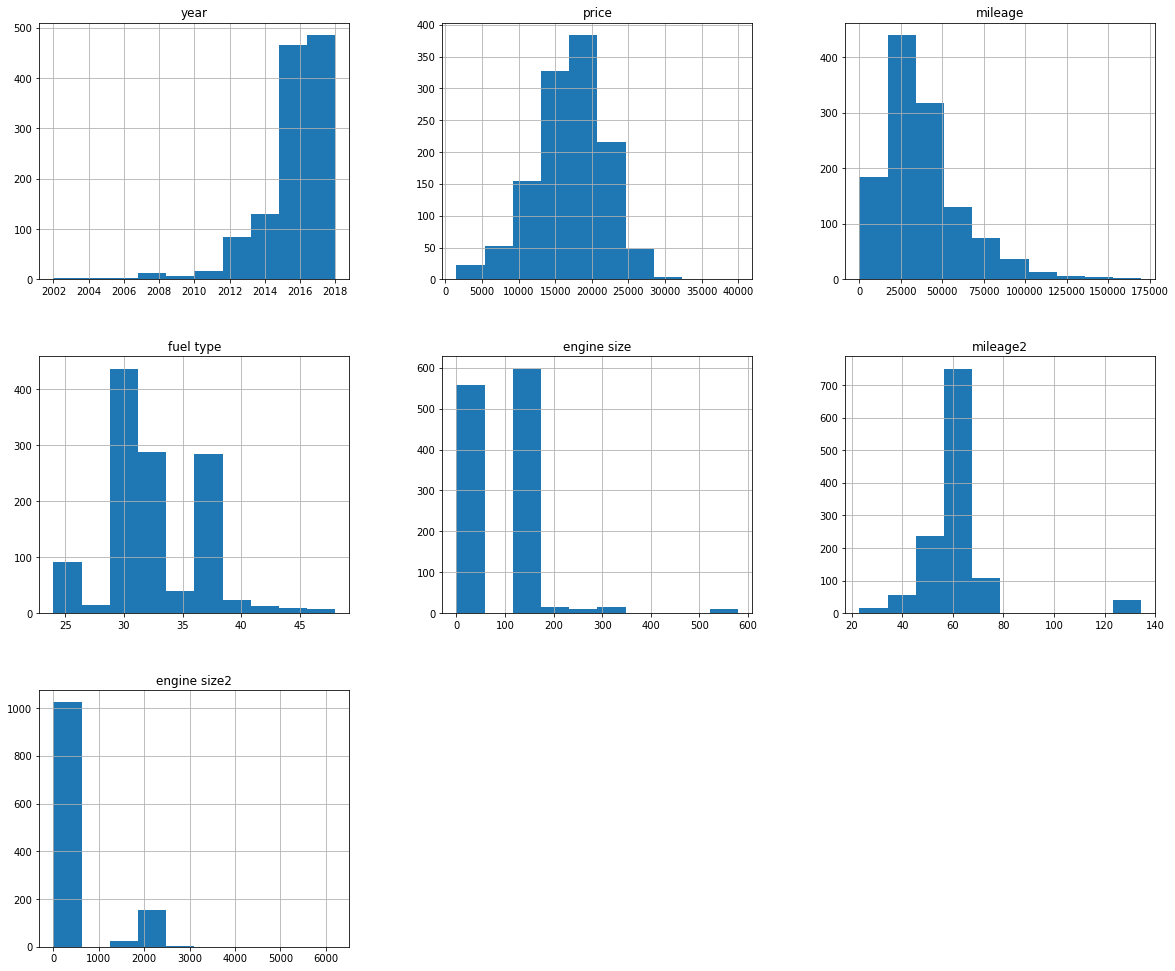

In [22]:
df_new.hist(figsize=(20,17))
plt.show()

<Figure size 432x288 with 0 Axes>

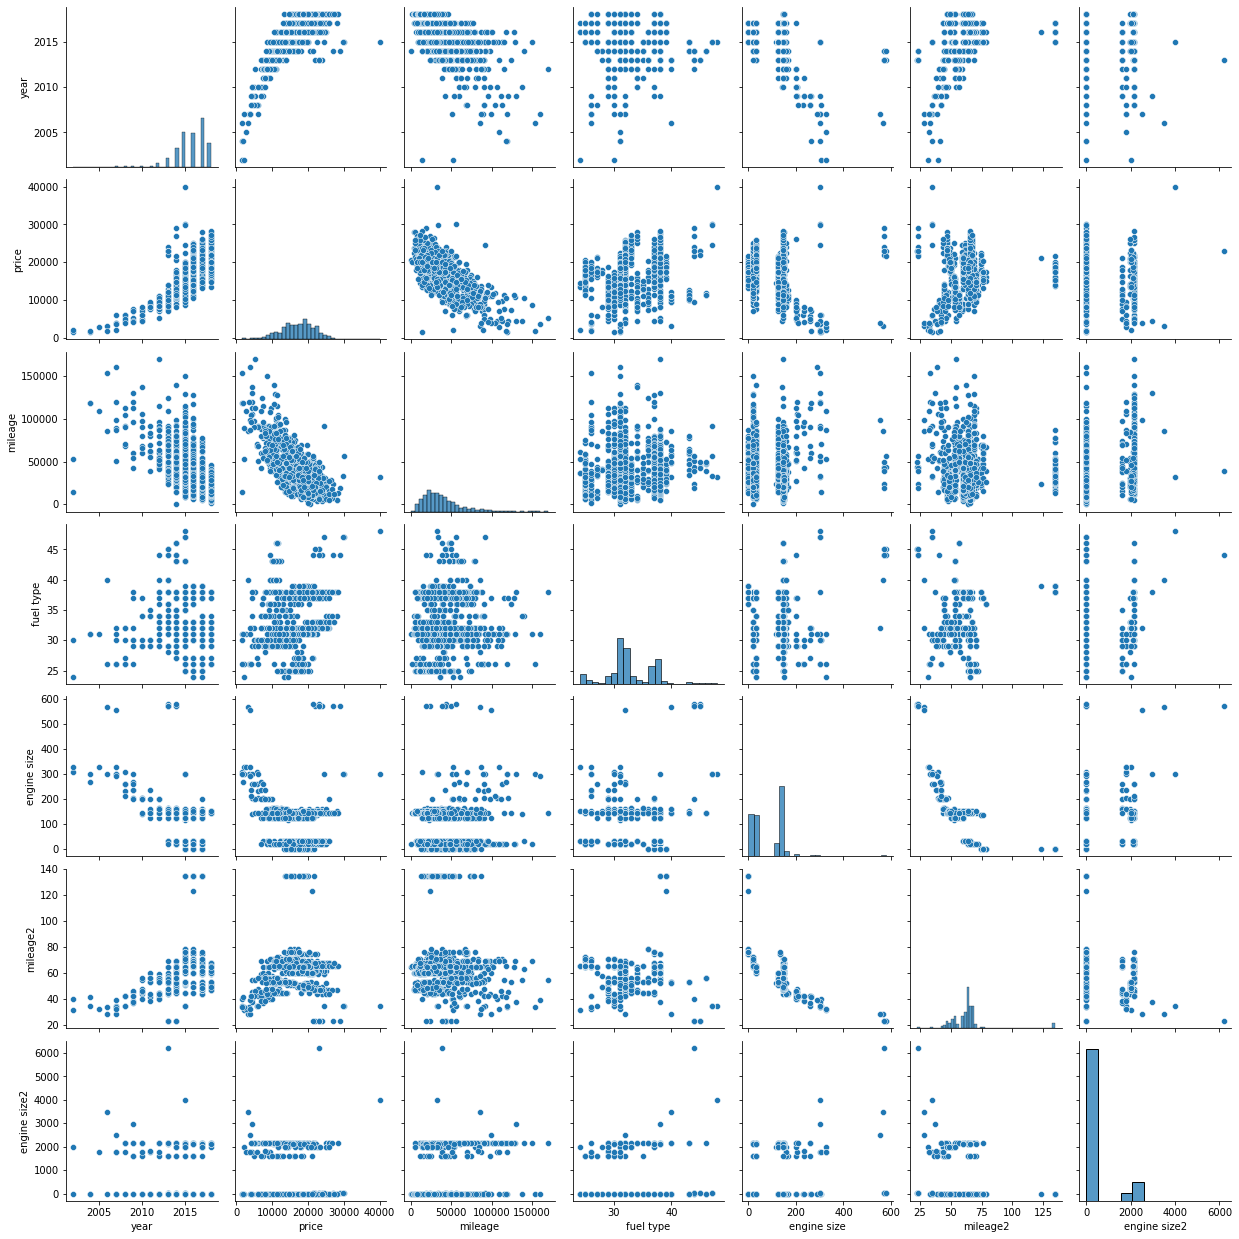

In [23]:
plt.figure()
sns.pairplot(df_new)
plt.show()

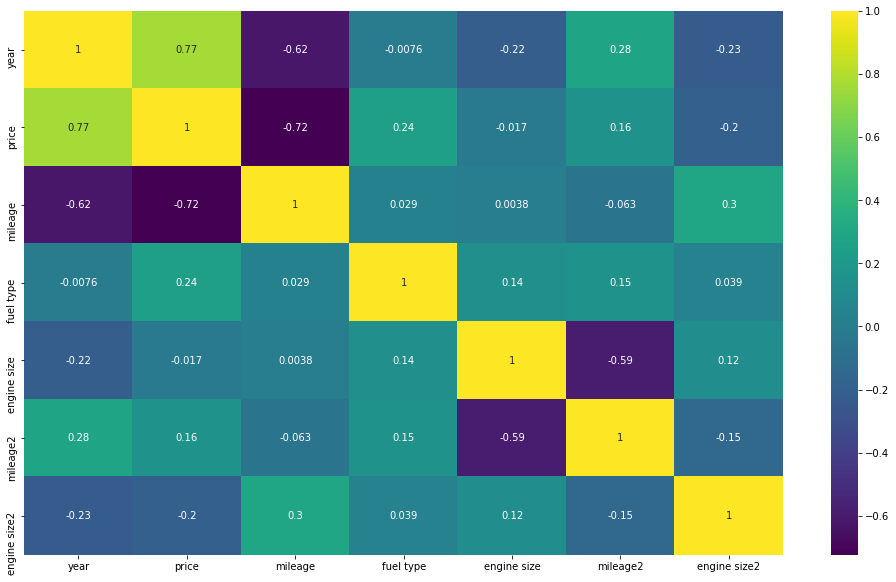

In [24]:
plt.figure(figsize=(17,10))
sns.heatmap(df_new.corr(),annot=True,cmap = 'viridis')
plt.show()

In [25]:
correlation = df_new.corr()['price'].abs().sort_values(ascending = False)
correlation

price           1.000000
year            0.767843
mileage         0.722719
fuel type       0.244547
engine size2    0.202440
mileage2        0.156582
engine size     0.016954
Name: price, dtype: float64

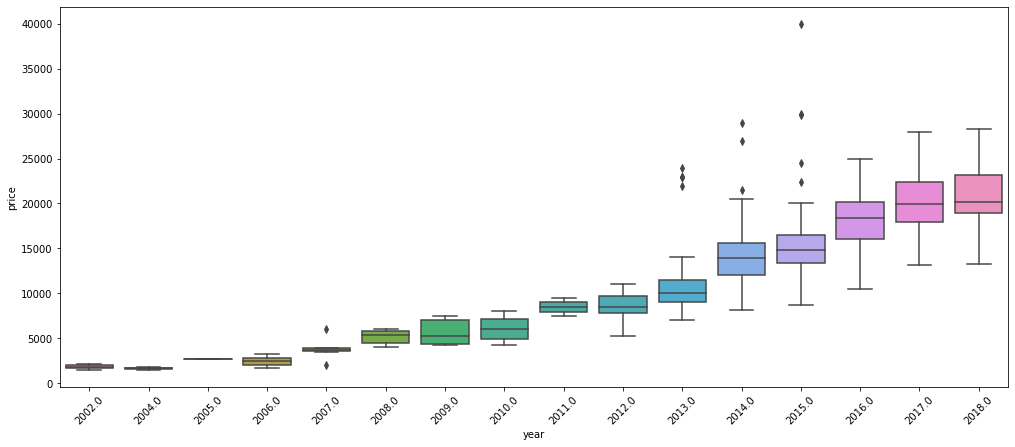

In [26]:
plt.figure(figsize=(17,7))
sns.boxplot(x='year',y='price',data=df_new)
plt.xticks(rotation=45)
plt.show()

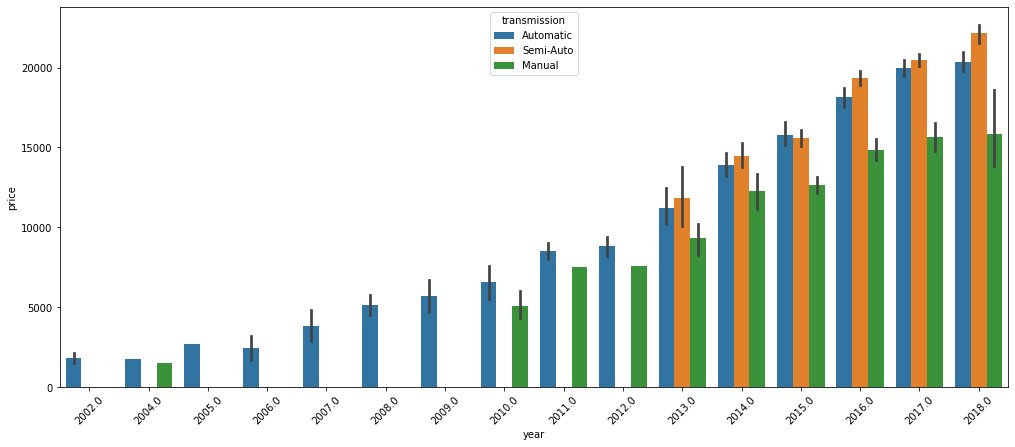

In [27]:
plt.figure(figsize=(17,7))
sns.barplot(x='year',y='price',data=df_new, hue='transmission')
plt.xticks(rotation=45)
plt.show()

### 3.Data Preparation

In [28]:
df_new['year'] = df_new['year'].astype(int)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1208 non-null   int64  
 1   model         1208 non-null   object 
 2   price         1208 non-null   float64
 3   transmission  1208 non-null   object 
 4   mileage       1208 non-null   float64
 5   fuel type     1208 non-null   float64
 6   engine size   1208 non-null   float64
 7   mileage2      1208 non-null   float64
 8   fuel type2    1208 non-null   object 
 9   engine size2  1208 non-null   float64
 10  reference     1208 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 103.9+ KB


In [30]:
df_new.drop(columns=['model','reference'],axis=1,inplace=True)

Encoding

Ordinal Encoding

In [31]:
df_new['year'].unique()

array([2013, 2012, 2011, 2015, 2016, 2017, 2014, 2009, 2007, 2018, 2010,
       2008, 2006, 2002, 2005, 2004])

In [32]:
df_new['year'] = df_new['year'].map({2013:10, 2012:9, 2011:8, 2015:12, 2016:13, 2017:14, 2014:11, 2009:6, 2007:4, 2018:15, 2010:7,
       2008:5, 2006:3, 2002:0, 2005:2, 2004:1})


In [33]:
df_ordinal = pd.DataFrame(df_new['year'])
df_ordinal

,year
0,10
1,9
2,9
3,8
4,12
...,...
1203,14
1204,15
1205,11
1206,11


One Hot Enfcoding

In [34]:
df_ohe = pd.get_dummies(df_new[['transmission','fuel type2']])
df_ohe

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel type2_Diesel,fuel type2_Hybrid,fuel type2_Other,fuel type2_Petrol
0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0
3,1,0,0,1,0,0,0
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1203,0,1,0,1,0,0,0
1204,1,0,0,1,0,0,0
1205,0,1,0,1,0,0,0
1206,1,0,0,1,0,0,0


In [35]:
scaler = MinMaxScaler()
df_scaled = df_new.drop(columns=['transmission','fuel type2','year','price'],axis=1)
df_scaled

,mileage,fuel type,engine size,mileage2,engine size2
0,44900.0,29.0,160.0,46.3,1.600
1,88200.0,34.0,125.0,58.9,2.100
2,115000.0,37.0,145.0,54.3,2.100
3,69250.0,29.0,150.0,53.3,2.100
4,49850.0,31.0,30.0,62.8,2.100
...,...,...,...,...,...
1203,31357.0,25.0,150.0,70.6,1.598
1204,28248.0,31.0,150.0,64.2,2.143
1205,48055.0,31.0,20.0,65.7,2.143
1206,49865.0,46.0,145.0,56.5,2.143


In [36]:
df_scaled.columns

Index(['mileage', 'fuel type', 'engine size', 'mileage2', 'engine size2'], dtype='object')

In [37]:
df_scaled[['mileage', 'fuel type', 'engine size', 'mileage2', 'engine size2']] = scaler.fit_transform(df_scaled)
df_scaled

,mileage,fuel type,engine size,mileage2,engine size2
0,0.264074,0.208333,0.275862,0.208969,3.222479e-07
1,0.518795,0.416667,0.215517,0.321973,8.088422e-05
2,0.676452,0.541667,0.250000,0.280717,8.088422e-05
3,0.407318,0.208333,0.258621,0.271749,8.088422e-05
4,0.293194,0.291667,0.051724,0.356951,8.088422e-05
...,...,...,...,...,...
1203,0.184405,0.041667,0.258621,0.426906,0.000000e+00
1204,0.166116,0.291667,0.258621,0.369507,8.781255e-05
1205,0.282634,0.291667,0.034483,0.382960,8.781255e-05
1206,0.293282,0.916667,0.250000,0.300448,8.781255e-05


In [38]:
df_scaled.reset_index(drop=True,inplace=True)

In [39]:
df_ordinal.reset_index(drop=True,inplace=True)

In [40]:
df_ohe.reset_index(drop=True,inplace=True)

In [41]:
dataset = pd.concat([df_scaled,df_ordinal,df_ohe],axis=1)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mileage                 1208 non-null   float64
 1   fuel type               1208 non-null   float64
 2   engine size             1208 non-null   float64
 3   mileage2                1208 non-null   float64
 4   engine size2            1208 non-null   float64
 5   year                    1208 non-null   int64  
 6   transmission_Automatic  1208 non-null   uint8  
 7   transmission_Manual     1208 non-null   uint8  
 8   transmission_Semi-Auto  1208 non-null   uint8  
 9   fuel type2_Diesel       1208 non-null   uint8  
 10  fuel type2_Hybrid       1208 non-null   uint8  
 11  fuel type2_Other        1208 non-null   uint8  
 12  fuel type2_Petrol       1208 non-null   uint8  
dtypes: float64(5), int64(1), uint8(7)
memory usage: 65.0 KB


In [43]:
dataset

,mileage,fuel type,engine size,mileage2,engine size2,year,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel type2_Diesel,fuel type2_Hybrid,fuel type2_Other,fuel type2_Petrol
0,0.264074,0.208333,0.275862,0.208969,3.222479e-07,10,1,0,0,0,0,0,1
1,0.518795,0.416667,0.215517,0.321973,8.088422e-05,9,1,0,0,1,0,0,0
2,0.676452,0.541667,0.250000,0.280717,8.088422e-05,9,1,0,0,1,0,0,0
3,0.407318,0.208333,0.258621,0.271749,8.088422e-05,8,1,0,0,1,0,0,0
4,0.293194,0.291667,0.051724,0.356951,8.088422e-05,12,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.184405,0.041667,0.258621,0.426906,0.000000e+00,14,0,1,0,1,0,0,0
1204,0.166116,0.291667,0.258621,0.369507,8.781255e-05,15,1,0,0,1,0,0,0
1205,0.282634,0.291667,0.034483,0.382960,8.781255e-05,11,0,1,0,1,0,0,0
1206,0.293282,0.916667,0.250000,0.300448,8.781255e-05,11,1,0,0,1,0,0,0


### 4.Model Training

In [44]:
### 3.Model Training

In [45]:
X = dataset
y = df_new['price']

In [46]:
X.shape

(1208, 13)

In [47]:
y.shape

(1208,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [50]:
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

Tanpa cross validation 

In [51]:
#mean_squared_error,r2_score

In [52]:
lr = lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
print('R-squared linear reggresion: ', r2_score(y_test, lr_y_pred))
print('MSE linear reggresion: ', mean_squared_error(y_test, lr_y_pred))

R-squared linear reggresion:  0.8076873549924377
MSE linear reggresion:  4483269.744149527


In [53]:
knn = knn.fit(X_train,y_train)
knn_y_pred = lr.predict(X_test)
print('R-squared knn: ', r2_score(y_test, knn_y_pred))
print('MSE linear knn: ', mean_squared_error(y_test, knn_y_pred))

R-squared knn:  0.8076873549924377
MSE linear knn:  4483269.744149527


In [57]:
rf = rf.fit(X_train,y_train)
rf_y_pred = lr.predict(X_test)
print('R-squared random forrest: ', r2_score(y_test, rf_y_pred))
print('MSE linear random forrest: ', mean_squared_error(y_test, rf_y_pred))

R-squared random forrest:  0.8076873549924377
MSE linear random forrest:  4483269.744149527


 Cross validation 

In [55]:
folds = KFold(n_splits = 5,random_state = 42)
lr_cv = cross_val_score(lr,X_train,y_train,cv=folds,scoring='r2').mean()
knn_cv = cross_val_score(knn,X_train,y_train,cv=folds,scoring='r2').mean()
rf_cv = cross_val_score(rf,X_train,y_train,cv=folds,scoring='r2').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [58]:
print('Logistitic Regression Cross Val :' ,lr_cv)
print('knn Cross Val :' ,knn_cv )
print('Random Forrest Cross Val :' ,rf_cv)

Logistitic Regression Cross Val : 0.7572972482458336
knn Cross Val : 0.7875252953197157
Random Forrest Cross Val : 0.920099087384249


### 5. Evaluation, Model Selection, and Model Tuning

Dari hasil Traningn ke 3 model dengan menggunakan cross valadation dan scoring yang digunakan adalah r2_score didapatkan hasil berikut :

* Logistitic Regression Cross Val : 0.7572972482458336
* knn Cross Val : 0.7875252953197157
* Random Forrest Cross Val : 0.9213235537770915

Model yang dipilih pada kasus ini adalah Random Forrest dan akan dilakukan tunning

### Hyper-parameter Tuning

In [59]:
param_grid = {
    'n_estimators': [50,100],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1,5],
    'max_features': ['auto', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(n_jobs=-1),
    param_grid,
    cv=folds
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbos

In [60]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [62]:
best_model = grid_search.best_estimator_.fit(X_train, y_train)

In [63]:
y_pred = best_model.predict(X_test)

In [64]:
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print('Random Forrest - Tunning MSE:', mse)
print('Random Forrest - Tunning r2:',r2)

Random Forrest - Tunning MSE: 1582796.3194391183
Random Forrest - Tunning r2: 0.9321049671176289


### 6. Result, Conclusion, and Recommendation 

Dalam model Machine Learning ada beberapa metode yang diterapkan:

* Sebagai user perlu sangat mempertimbangka umur mobil, dan milage sebelum membeli, karena dua feature tersebut mempunya nilai korelasi yang sangat besar

*   Data Cleaning, dikarenakan data yang sangat kotor, banyak sekali data yang kosong, dan tidak pada tempatnya : tipe data object akan tetapi mewakili numerikal, seperti pada price terdapat currecy label dll
*   Membagi feature yang berisi data kategorikal dan numerikal dan melakukan encoding pada data kategorikal, pada kasus ini digunakan dua cara encoding yaitu : Ordinal encoding pada = tahun, dan sisanya ohe hot encoding
* Scaling pada data yang bersifat numerical
*   Pada Model training menggunakan 3 yaitu Linear Reggresion, KNN, dan Random Forrest 
* Didapatkan model terbaik yaitu random forrest, selanjutnya dilakukan hyper parameter tunnig menggunaka grid search


**Conclusion**

Random Forrest dengan perlakuan tunning pada kasus ini merupakan model terbaik karena memilki r2.score = 0.93 ~ 93%, tidak begitu signifikan kenaikan nilai r2 nya setelah ditunning, hanya naik sekitar 0.01, atau sekitar 1%. Diharapkan model ini berguna untuk user yang ingin membeli mobil mercedes CCclass

